# Using pandas to import historical market data

In [2]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data, wb
import datetime, math

In [3]:
start = datetime.datetime(1900, 1, 1)
end   = datetime.datetime(2017, 1, 1)

In [4]:
df = data.DataReader("XLF", 'yahoo', start, end)
df['adjClose'] = df['Adj Close']
df.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], axis=1, inplace=True)

In [5]:
df.axes

[DatetimeIndex(['1998-12-22', '1998-12-23', '1998-12-24', '1998-12-28',
                '1998-12-29', '1998-12-30', '1998-12-31', '1999-01-04',
                '1999-01-05', '1999-01-06',
                ...
                '2016-07-11', '2016-07-12', '2016-07-13', '2016-07-14',
                '2016-07-15', '2016-07-18', '2016-07-19', '2016-07-20',
                '2016-07-21', '2016-07-22'],
               dtype='datetime64[ns]', name=u'Date', length=4424, freq=None),
 Index([u'adjClose'], dtype='object')]

In [6]:
df['prevClose'] = df['adjClose'].shift(1)

In [7]:
df['mean'] = df['adjClose'].rolling(window=10).mean()

In [12]:
def trade(row):
    if   (row['adjClose'] - row['mean']) / row['prevClose'] > +0.01:
        return -1
    elif (row['adjClose'] - row['mean']) / row['prevClose'] < -0.01:
        return +1
    else:
        return 0
df['trade'] = df.apply(lambda x: trade(x), axis=1).shift(1)
df['pnl'] = df.apply(lambda x: x['trade']*(x['adjClose'] - x['prevClose']) / x['prevClose'], axis=1)
df['cumpnl'] = np.cumprod(df['pnl']+1)

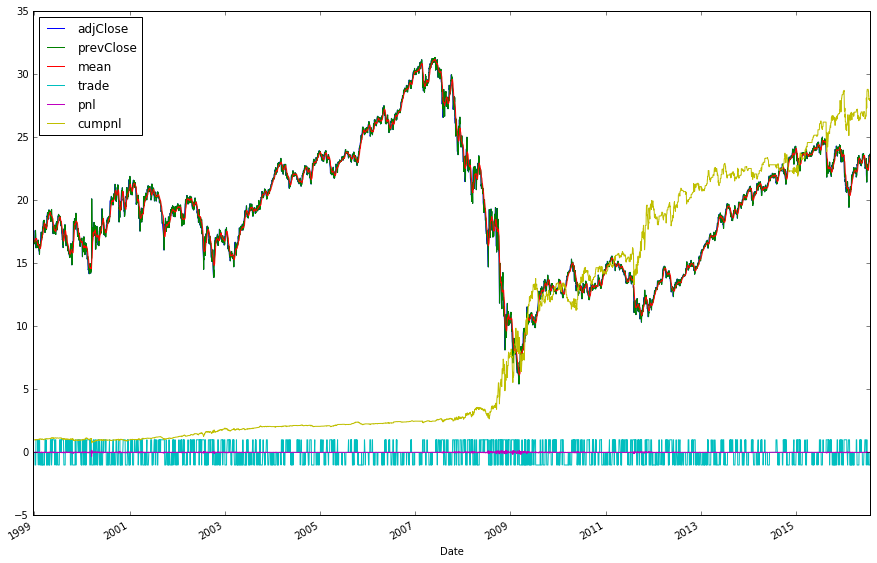

In [13]:
df.plot()

Sharp Ratio: 3.33924059817


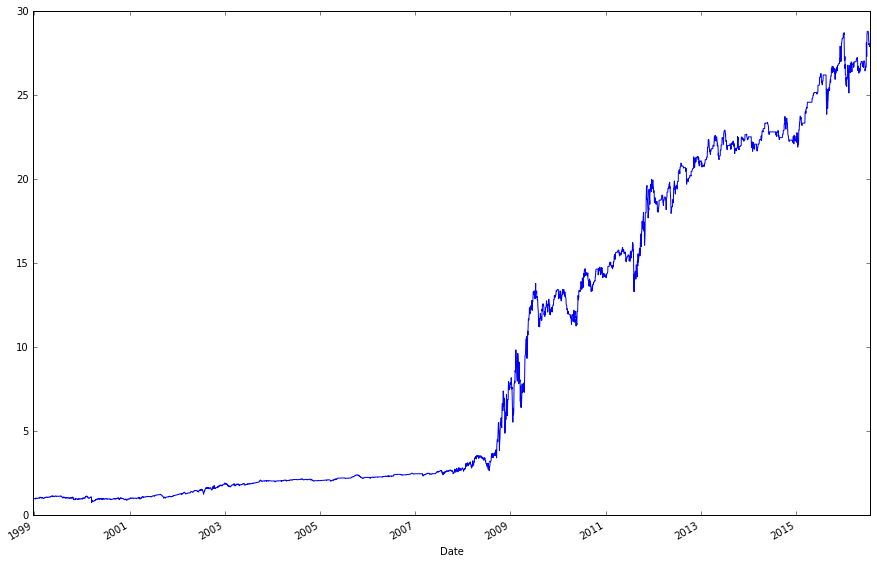

In [21]:
df['cumpnl'].plot()
print 'Sharp Ratio: {}'.format(math.sqrt(len(df['pnl'])) * df['pnl'].mean() / df['pnl'].std())

Copyright (c) 2016 Shen Yu